In [1]:
import pandas as pd
import numpy as np
import json

## Clean-up annotations data

In [2]:
from pre_processing_data import normalise_annotations_dataframe

In [3]:
df = pd.read_csv("/content/eva-hardhat-dataset_csv.csv")
df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,eva_1.jpg,20449,"{""caption"":"""",""public_domain"":""no"",""image_url""...",3,0,"{""name"":""rect"",""x"":248,""y"":4,""width"":131,""heig...","{""name"":""hardhat"",""type"":""unknown"",""image_qual..."
1,eva_1.jpg,20449,"{""caption"":"""",""public_domain"":""no"",""image_url""...",3,1,"{""name"":""rect"",""x"":275,""y"":91,""width"":92,""heig...","{""name"":""mask"",""type"":""unknown"",""image_quality..."
2,eva_1.jpg,20449,"{""caption"":"""",""public_domain"":""no"",""image_url""...",3,2,"{""name"":""rect"",""x"":191,""y"":167,""width"":234,""he...","{""name"":""vest"",""type"":""unknown"",""image_quality..."
3,eva_2.jpg,187125,"{""caption"":"""",""public_domain"":""no"",""image_url""...",5,0,"{""name"":""rect"",""x"":242,""y"":98,""width"":115,""hei...","{""name"":""hardhat"",""type"":""unknown"",""image_qual..."
4,eva_2.jpg,187125,"{""caption"":"""",""public_domain"":""no"",""image_url""...",5,1,"{""name"":""rect"",""x"":437,""y"":64,""width"":120,""hei...","{""name"":""hardhat"",""type"":""unknown"",""image_qual..."


In [4]:
bbox_df = normalise_annotations_dataframe(df)

In [5]:
bbox_df.head()

,CX,CY,H,W,class_label,filename
0,248.0,4.0,85.0,131.0,hardhat,eva_1.jpg
1,275.0,91.0,58.0,92.0,mask,eva_1.jpg
2,191.0,167.0,131.0,234.0,vest,eva_1.jpg
3,242.0,98.0,82.0,115.0,hardhat,eva_2.jpg
4,437.0,64.0,79.0,120.0,hardhat,eva_2.jpg


In [6]:
bbox_df.to_csv("bbox_data.csv",index=False)

# Get image size information

In [7]:
from pre_processing_data import get_image_size_info

images_path = r"/content/images"
images_df = get_image_size_info(images_path)

In [8]:
images_df.head()

,image_file_name,img_h,img_w
0,eva_16.jpg,333,500
1,eva_84.jpg,400,900
2,eva_44.jpg,292,560
3,eva_113.jpg,575,870
4,eva_62.jpg,375,500


In [9]:
images_df.to_csv("image_shape_data.csv",index=False)

# Clustering

In [10]:
img_df = pd.read_csv("image_shape_data.csv")
bbox_data_df = pd.read_csv("bbox_data.csv")
bbox_data_df.rename(columns = {"filename":"image_file_name"},inplace=True)

In [11]:
bbox_with_img_data_df = pd.merge(
    left = img_df,
    right = bbox_data_df,
    on = "image_file_name"
)

In [12]:
bbox_with_img_data_df.head()

,image_file_name,img_h,img_w,CX,CY,H,W,class_label
0,eva_16.jpg,333,500,74.0,99.0,21.0,41.0,hardhat
1,eva_16.jpg,333,500,130.0,98.0,20.0,33.0,hardhat
2,eva_16.jpg,333,500,140.0,177.0,23.0,36.0,hardhat
3,eva_16.jpg,333,500,220.0,172.0,26.0,46.0,hardhat
4,eva_16.jpg,333,500,341.0,86.0,26.0,29.0,hardhat


In [13]:
def normalise_row(row):
  """."""
  row["cx"] = row["CX"]/row["img_w"]
  row["cy"] = row["CY"]/row["img_h"]
  row["h"] = row["H"]/row["img_w"]
  row["w"] = row["W"]/row["img_h"] 
  return row
bbox_with_img_data_df = bbox_with_img_data_df.apply(
    lambda row: normalise_row(row),
    axis=1
)

In [14]:
bbox_with_img_data_df.head()

,image_file_name,img_h,img_w,CX,CY,H,W,class_label,cx,cy,h,w
0,eva_16.jpg,333,500,74.0,99.0,21.0,41.0,hardhat,0.148,0.297297,0.042,0.123123
1,eva_16.jpg,333,500,130.0,98.0,20.0,33.0,hardhat,0.260,0.294294,0.040,0.099099
2,eva_16.jpg,333,500,140.0,177.0,23.0,36.0,hardhat,0.280,0.531532,0.046,0.108108
3,eva_16.jpg,333,500,220.0,172.0,26.0,46.0,hardhat,0.440,0.516517,0.052,0.138138
4,eva_16.jpg,333,500,341.0,86.0,26.0,29.0,hardhat,0.682,0.258258,0.052,0.087087


In [15]:
bbox_with_img_data_df["class_label"].value_counts()

hardhat    302
boots      256
vest       184
mask        40
Name: class_label, dtype: int64

In [16]:
from clustering import draw_scatter_plot
from clustering import  draw_kmeans_knee_plot

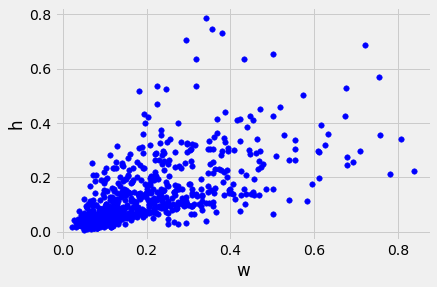

<Figure size 432x288 with 0 Axes>

In [17]:
draw_scatter_plot(bbox_with_img_data_df)

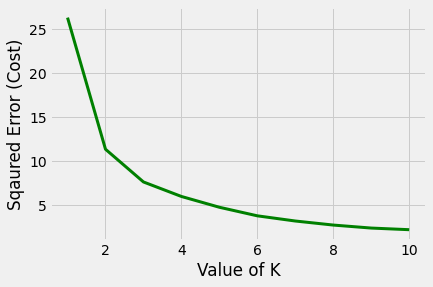

<Figure size 432x288 with 0 Axes>

In [18]:
X = bbox_with_img_data_df[["h","w"]].values
draw_kmeans_knee_plot(X)

From the knee plot we are not sure which is the optimal value for k.

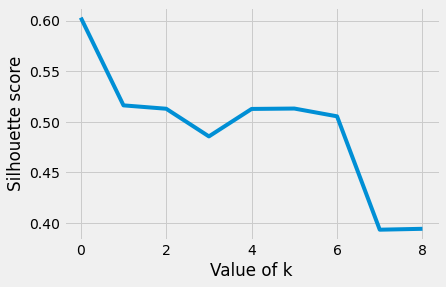

<Figure size 432x288 with 0 Axes>

In [19]:
from clustering import draw_silhoutte_score_plot
draw_silhoutte_score_plot(X)

In Silhoutte score plot we should choose the k value that gives the highest Silhoutte score. Hense we can choose 4.